In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Flatten, BatchNormalization, Activation, Dense, Dropout
from keras.optimizers import Adam, SGD, Adagrad
from keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l1, l2

In [41]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print('Using GPU')
else:
    print('Using CPU')

Using CPU


In [32]:
train_df = pd.read_csv('534datasets\emnist-balanced-train.csv', header=None)
test_df = pd.read_csv('534datasets\emnist-balanced-test.csv', header=None)

# Load the label map
label_map = pd.read_csv('534datasets\emnist-balanced-mapping.txt', delimiter = ' ', index_col=0, header=None)
label_dictionary = {}
for index, row in label_map.iterrows():
    label_dictionary[index] = chr(row[1])


In [33]:
# Preprocess the data
x_train = train_df.iloc[:, 1:].values / 255
y_train = train_df.iloc[:, 0].values
x_test = test_df.iloc[:, 1:].values / 255
y_test = test_df.iloc[:, 0].values

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
print(f'Number of Training dataset: {y_train.shape[0]}, Number of Testing dataset: {y_test.shape[0]}')

Number of Training dataset: 112800, Number of Testing dataset: 18800


Label entry 42: N


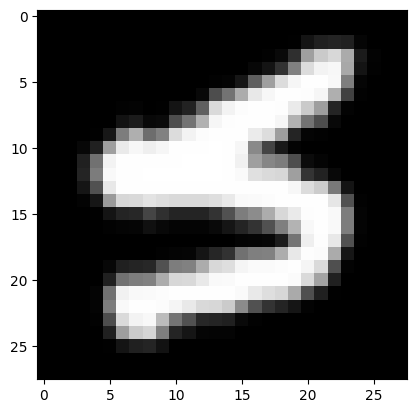

In [34]:
sample_image = x_train[42]
sample_label = y_train[42]
print("Label entry 42:", label_dictionary[sample_label])
plt.imshow(sample_image.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

In [35]:
def reshape_and_rotate(image):
    image = image.reshape(28, 28)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

# Apply reshape_and_rotate
x_train = np.apply_along_axis(reshape_and_rotate, 1, x_train)
x_test = np.apply_along_axis(reshape_and_rotate, 1, x_test)

# Reshape the data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

num_classes = 47
# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

Label entry 42: 0


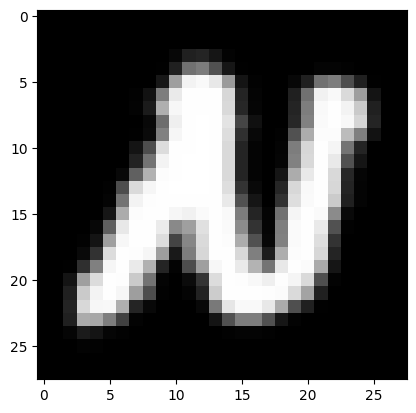

In [36]:
sample_image = x_train[42]
sample_label = y_train[42]
print("Label entry 42:", label_dictionary[sample_label[0]])
plt.imshow(sample_image.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

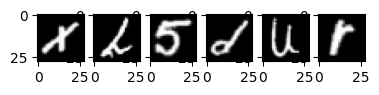

In [37]:
for i in range(100, 106):
    plt.subplot(390 + (i+1))
    sample = x_train[i]
    plt.imshow(sample.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

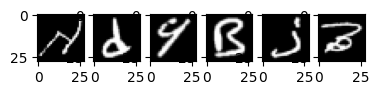

In [38]:
for i in range(100, 106):
    plt.subplot(390 + (i+1))
    sample = x_test[i]
    plt.imshow(sample.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

# MLP Part

In [7]:
model_mlp_test = Sequential()
model_mlp_test.add(Flatten(input_shape=(28, 28, 1)))
model_mlp_test.add(Dense(512))
model_mlp_test.add(Activation('relu'))
model_mlp_test.add(Dense(256))
model_mlp_test.add(Activation('relu'))
model_mlp_test.add(Dense(128))  # New layer
model_mlp_test.add(Activation('relu'))  # New layer
model_mlp_test.add(Dense(num_classes, activation='softmax'))  # Set the number of units to num_classes

# Compile the model
opt = Adam(learning_rate=0.001)
model_mlp_test.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model
model_mlp_test.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

train_loss, train_accuracy = model_mlp_test.evaluate(x_train, y_train)
print(f'Training loss: {train_loss}, Training accuracy: {train_accuracy}')
# Evaluate the model
loss, accuracy = model_mlp_test.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3525/3525 ━━━━━━━━━━━━━━━━━━━━ 3s 963us/step - accuracy: 0.9451 - loss: 0.1403
Training loss: 0.14216658473014832, Training accuracy: 0.9440248012542725
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 0.8444 - loss: 0.5900
 Testing Loss: 0.5860474109649658, Testing Accuracy: 0.844840407371521


## 0. Initial one. <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: Relu <br>
    Optimizers: ADAM <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: l2(0.001) <br>
    Dropout: with <br>

In [8]:
results_mlp = pd.DataFrame(columns=['Loss', 'Accuracy'])

model_mlp_0 = Sequential()
model_mlp_0.add(Flatten(input_shape=(28, 28, 1)))
model_mlp_0.add(Dense(512, kernel_regularizer=l2(0.001)))
model_mlp_0.add(BatchNormalization())
model_mlp_0.add(Activation('relu'))
model_mlp_0.add(Dropout(0.2))
model_mlp_0.add(Dense(256, kernel_regularizer=l2(0.001)))
model_mlp_0.add(BatchNormalization())
model_mlp_0.add(Activation('relu'))
model_mlp_0.add(Dropout(0.2))
model_mlp_0.add(Dense(128, kernel_regularizer=l2(0.001)))  # New layer
model_mlp_0.add(BatchNormalization())  # New layer
model_mlp_0.add(Activation('relu'))  # New layer
model_mlp_0.add(Dropout(0.5))
model_mlp_0.add(Dense(num_classes, activation='softmax'))  # Set the number of units to num_classes

# Compile the model
opt = Adam(learning_rate=0.001)
model_mlp_0.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model
model_mlp_0.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

train_loss, train_accuracy = model_mlp_0.evaluate(x_train, y_train)
print(f'Training loss: {train_loss}, Training accuracy: {train_accuracy}')
# Evaluate the model
loss, accuracy = model_mlp_0.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
# Assign the results_mlp to the 'mlp_1' row in the DataFrame
results_mlp.loc['mlp_0'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3525/3525 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8706 - loss: 0.5886
Training loss: 0.5897901654243469, Training accuracy: 0.8687854409217834
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8480 - loss: 0.6859
 Testing Loss: 0.6911857724189758, Testing Accuracy: 0.842659592628479


## 1. Learning rate reduction. <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: Relu <br>
    Optimizers: ADAM <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: l2(0.001) <br>
    Dropout: with <br>

In [9]:
model_mlp_1 = Sequential()
model_mlp_1.add(Flatten(input_shape=(28, 28, 1)))
model_mlp_1.add(Dense(512, kernel_regularizer=l2(0.001)))
model_mlp_1.add(BatchNormalization())
model_mlp_1.add(Activation('relu'))
model_mlp_1.add(Dropout(0.2))
model_mlp_1.add(Dense(256, kernel_regularizer=l2(0.001)))
model_mlp_1.add(BatchNormalization())
model_mlp_1.add(Activation('relu'))
model_mlp_1.add(Dropout(0.2))
model_mlp_1.add(Dense(128, kernel_regularizer=l2(0.001)))  # New layer
model_mlp_1.add(BatchNormalization())  # New layer
model_mlp_1.add(Activation('relu'))  # New layer
model_mlp_1.add(Dropout(0.5))
model_mlp_1.add(Dense(num_classes, activation='softmax'))  # Set the number of units to num_classes

# Compile the model
opt = Adam(learning_rate=0.001)
model_mlp_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=0, factor=0.5, min_lr=0.00001)

# Fit the model
model_mlp_1.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test), callbacks=[lr_reduction])

# Evaluate the model
loss, accuracy = model_mlp_1.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
# Assign the results_mlp to the 'mlp_1' row in the DataFrame
results_mlp.loc['mlp_1'] = [loss, accuracy]


d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8587 - loss: 0.5847
 Testing Loss: 0.5831805467605591, Testing Accuracy: 0.858404278755188


## 2. Change Learning Rate <br>
    Adaptive Learning Rate: 0.01 <br>
    Activation function: Relu <br>
    Optimizers: ADAM <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: l2(0.001) <br>
    Dropout: with <br>

In [10]:
model_mlp_2 = Sequential()
model_mlp_2.add(Flatten(input_shape=(28, 28, 1)))
model_mlp_2.add(Dense(512, kernel_regularizer=l2(0.001)))
model_mlp_2.add(BatchNormalization())
model_mlp_2.add(Activation('relu'))
model_mlp_2.add(Dropout(0.2))
model_mlp_2.add(Dense(256, kernel_regularizer=l2(0.001)))
model_mlp_2.add(BatchNormalization())
model_mlp_2.add(Activation('relu'))
model_mlp_2.add(Dropout(0.2))
model_mlp_2.add(Dense(128, kernel_regularizer=l2(0.001)))  # New layer
model_mlp_2.add(BatchNormalization())  # New layer
model_mlp_2.add(Activation('relu'))  # New layer
model_mlp_2.add(Dropout(0.5))
model_mlp_2.add(Dense(num_classes, activation='softmax'))  # Set the number of units to num_classes

# Compile the model
opt = Adam(learning_rate=0.01)
model_mlp_2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model
model_mlp_2.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model_mlp_2.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
# Assign the results_mlp to the 'mlp_1' row in the DataFrame
results_mlp.loc['mlp_2'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7194 - loss: 1.5813
 Testing Loss: 1.588408350944519, Testing Accuracy: 0.7181915044784546


## 3. Change L2 regularizaition to L1 regularization. <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: Relu <br>
    Optimizers: ADAM <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: l1(0.0001) <br>
    Dropout: with <br>

In [11]:
model_mlp_3 = Sequential()
model_mlp_3.add(Flatten(input_shape=(28, 28, 1)))
model_mlp_3.add(Dense(512, kernel_regularizer=l1(0.0001)))
model_mlp_3.add(BatchNormalization())
model_mlp_3.add(Activation('relu'))
model_mlp_3.add(Dropout(0.2))
model_mlp_3.add(Dense(256, kernel_regularizer=l1(0.0001)))
model_mlp_3.add(BatchNormalization())
model_mlp_3.add(Activation('relu'))
model_mlp_3.add(Dropout(0.2))
model_mlp_3.add(Dense(128, kernel_regularizer=l1(0.0001)))  # New layer
model_mlp_3.add(BatchNormalization())  # New layer
model_mlp_3.add(Activation('relu'))  # New layer
model_mlp_3.add(Dropout(0.5))
model_mlp_3.add(Dense(num_classes, activation='softmax'))  # Set the number of units to num_classes

# Compile the model
opt = Adam(learning_rate=0.001)
model_mlp_3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model
model_mlp_3.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model_mlp_3.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
# Assign the results_mlp to the 'mlp_1' row in the DataFrame
results_mlp.loc['mlp_3'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8380 - loss: 0.9725
 Testing Loss: 0.9704720973968506, Testing Accuracy: 0.8380318880081177


## 4. Without any regularization method <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: Relu <br>
    Optimizers: ADAM <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: None <br>
    Dropout: with <br>

In [12]:
model_mlp_4 = Sequential()
model_mlp_4.add(Flatten(input_shape=(28, 28, 1)))
model_mlp_4.add(Dense(512))
model_mlp_4.add(BatchNormalization())
model_mlp_4.add(Activation('relu'))
model_mlp_4.add(Dropout(0.2))
model_mlp_4.add(Dense(256))
model_mlp_4.add(BatchNormalization())
model_mlp_4.add(Activation('relu'))
model_mlp_4.add(Dropout(0.2))
model_mlp_4.add(Dense(128))  # New layer
model_mlp_4.add(BatchNormalization())  # New layer
model_mlp_4.add(Activation('relu'))  # New layer
model_mlp_4.add(Dropout(0.5))
model_mlp_4.add(Dense(num_classes, activation='softmax'))  # Set the number of units to num_classes

# Compile the model
opt = Adam(learning_rate=0.001)
model_mlp_4.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model
model_mlp_4.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

loss, accuracy = model_mlp_4.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
# Assign the results_mlp to the 'mlp_1' row in the DataFrame
results_mlp.loc['mlp_4'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8604 - loss: 0.4143
 Testing Loss: 0.4130280315876007, Testing Accuracy: 0.8604786992073059


## 5. Try Sigmoid Activation Function. <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: sigmoid <br>
    Optimizers: ADAM <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: l2(0.001) <br>
    Dropout: with <br>


In [13]:
model_mlp_5 = Sequential()
model_mlp_5.add(Flatten(input_shape=(28, 28, 1)))
model_mlp_5.add(Dense(512, kernel_regularizer=l2(0.001)))
model_mlp_5.add(BatchNormalization())
model_mlp_5.add(Activation('sigmoid'))
model_mlp_5.add(Dropout(0.2))
model_mlp_5.add(Dense(256, kernel_regularizer=l2(0.001)))
model_mlp_5.add(BatchNormalization())
model_mlp_5.add(Activation('sigmoid'))
model_mlp_5.add(Dropout(0.2))
model_mlp_5.add(Dense(128, kernel_regularizer=l2(0.001)))  # New layer
model_mlp_5.add(BatchNormalization())  # New layer
model_mlp_5.add(Activation('sigmoid'))  # New layer
model_mlp_5.add(Dropout(0.5))
model_mlp_5.add(Dense(num_classes, activation='softmax'))  # Set the number of units to num_classes

# Compile the model
opt = Adam(learning_rate=0.001)
model_mlp_5.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model
model_mlp_5.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

loss, accuracy = model_mlp_5.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
results_mlp.loc['mlp_5'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8154 - loss: 0.7496
 Testing Loss: 0.7526416182518005, Testing Accuracy: 0.8132447004318237


##  6. Try Tanh Activation Function <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: tanh <br>
    Optimizers: ADAM <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: l2(0.001) <br>
    Dropout: with <br>

In [14]:
model_mlp_6 = Sequential()
model_mlp_6.add(Flatten(input_shape=(28, 28, 1)))
model_mlp_6.add(Dense(512, kernel_regularizer=l2(0.001)))
model_mlp_6.add(BatchNormalization())
model_mlp_6.add(Activation('tanh'))
model_mlp_6.add(Dropout(0.2))
model_mlp_6.add(Dense(256, kernel_regularizer=l2(0.001)))
model_mlp_6.add(BatchNormalization())
model_mlp_6.add(Activation('tanh'))
model_mlp_6.add(Dropout(0.2))
model_mlp_6.add(Dense(128, kernel_regularizer=l2(0.001)))  # New layer
model_mlp_6.add(BatchNormalization())  # New layer
model_mlp_6.add(Activation('tanh'))  # New layer
model_mlp_6.add(Dropout(0.5))
model_mlp_6.add(Dense(num_classes, activation='softmax'))  # Set the number of units to num_classes

# Compile the model
opt = Adam(learning_rate=0.001)
model_mlp_6.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model
model_mlp_6.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

loss, accuracy = model_mlp_6.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
results_mlp.loc['mlp_6'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8327 - loss: 0.7119
 Testing Loss: 0.7144442200660706, Testing Accuracy: 0.830531895160675


## 7. Without Batch Normalization. <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: Relu <br>
    Optimizers: ADAM <br>
    Batch Normalization: without <br>
    L1 & L2 regularization: l2(0.001) <br>
    Dropout: with <br>

In [15]:
model_mlp_7 = Sequential()
model_mlp_7.add(Flatten(input_shape=(28, 28, 1)))
model_mlp_7.add(Dense(512, kernel_regularizer=l2(0.001)))
model_mlp_7.add(Activation('relu'))
model_mlp_7.add(Dropout(0.2))
model_mlp_7.add(Dense(256, kernel_regularizer=l2(0.001)))
model_mlp_7.add(Activation('relu'))
model_mlp_7.add(Dropout(0.2))
model_mlp_7.add(Dense(128, kernel_regularizer=l2(0.001)))  # New layer
model_mlp_7.add(Activation('relu'))  # New layer
model_mlp_7.add(Dropout(0.5))
model_mlp_7.add(Dense(num_classes, activation='softmax'))  # Set the number of units to num_classes

# Compile the model
opt = Adam(learning_rate=0.001)
model_mlp_7.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model
model_mlp_7.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

loss, accuracy = model_mlp_7.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
results_mlp.loc['mlp_7'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8394 - loss: 0.7595
 Testing Loss: 0.7600885033607483, Testing Accuracy: 0.8379255533218384


## 8. Without Dropout. <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: Relu <br>
    Optimizers: ADAM <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: l2(0.001) <br>
    Dropout: without <br>

In [16]:
model_mlp_8 = Sequential()
model_mlp_8.add(Flatten(input_shape=(28, 28, 1)))
model_mlp_8.add(Dense(512, kernel_regularizer=l2(0.001)))
model_mlp_8.add(BatchNormalization())
model_mlp_8.add(Activation('relu'))
model_mlp_8.add(Dense(256, kernel_regularizer=l2(0.001)))
model_mlp_8.add(BatchNormalization())
model_mlp_8.add(Activation('relu'))
model_mlp_8.add(Dense(128, kernel_regularizer=l2(0.001)))  # New layer
model_mlp_8.add(BatchNormalization())  # New layer
model_mlp_8.add(Activation('relu'))  # New layer
model_mlp_8.add(Dense(num_classes, activation='softmax'))  # Set the number of units to num_classes

# Compile the model
opt = Adam(learning_rate=0.001)
model_mlp_8.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model
model_mlp_8.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

loss, accuracy = model_mlp_8.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
results_mlp.loc['mlp_8'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8449 - loss: 0.6419
 Testing Loss: 0.6413060426712036, Testing Accuracy: 0.8423936367034912


## 9. Try SGD Optimizer. <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: Relu <br>
    Optimizers: ADAM <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: l2(0.001) <br>
    Dropout: with <br>

In [17]:
model_mlp_9 = Sequential()
model_mlp_9.add(Flatten(input_shape=(28, 28, 1)))
model_mlp_9.add(Dense(512, kernel_regularizer=l2(0.001)))
model_mlp_9.add(BatchNormalization())
model_mlp_9.add(Activation('relu'))
model_mlp_9.add(Dropout(0.2))
model_mlp_9.add(Dense(256, kernel_regularizer=l2(0.001)))
model_mlp_9.add(BatchNormalization())
model_mlp_9.add(Activation('relu'))
model_mlp_9.add(Dropout(0.2))
model_mlp_9.add(Dense(128, kernel_regularizer=l2(0.001)))  # New layer
model_mlp_9.add(BatchNormalization())  # New layer
model_mlp_9.add(Activation('relu'))  # New layer
model_mlp_9.add(Dropout(0.5))
model_mlp_9.add(Dense(num_classes, activation='softmax'))  # Set the number of units to num_classes
 
# Compile the model
opt = SGD(learning_rate=0.001)
model_mlp_9.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
 
# Fit the model
model_mlp_9.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

loss, accuracy = model_mlp_9.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
results_mlp.loc['mlp_9'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4913 - loss: 3.4226
 Testing Loss: 3.424962282180786, Testing Accuracy: 0.4929255247116089


## 10. Try Adagrad Optimizer. <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: Relu <br>
    Optimizers: Adagrad <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: l2(0.001) <br>
    Dropout: with <br>

In [18]:
model_mlp_10 = Sequential()
model_mlp_10.add(Flatten(input_shape=(28, 28, 1)))
model_mlp_10.add(Dense(512, kernel_regularizer=l2(0.001)))
model_mlp_10.add(BatchNormalization())
model_mlp_10.add(Activation('relu'))
model_mlp_10.add(Dropout(0.2))
model_mlp_10.add(Dense(256, kernel_regularizer=l2(0.001)))
model_mlp_10.add(BatchNormalization())
model_mlp_10.add(Activation('relu'))
model_mlp_10.add(Dropout(0.2))
model_mlp_10.add(Dense(128, kernel_regularizer=l2(0.001)))  # New layer
model_mlp_10.add(BatchNormalization())  # New layer
model_mlp_10.add(Activation('relu'))  # New layer
model_mlp_10.add(Dropout(0.5))
model_mlp_10.add(Dense(num_classes, activation='softmax'))  # Set the number of units to num_classes
 
# Compile the model
opt = Adagrad(learning_rate=0.001)
model_mlp_10.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
 
# Fit the model
model_mlp_10.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

loss, accuracy = model_mlp_10.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
results_mlp.loc['mlp_10'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6205 - loss: 2.6696
 Testing Loss: 2.672693967819214, Testing Accuracy: 0.6227127909660339


In [19]:
print(results_mlp)


mlp_0_accuracy = results_mlp.loc['mlp_0', 'Accuracy']

for model_name, accuracy in results_mlp.iterrows():
    # Check if the accuracy is higher than mlp_0_accuracy
    if accuracy['Accuracy'] > mlp_0_accuracy:
        print(f'Model: {model_name}, Accuracy: {accuracy["Accuracy"]}')

            Loss  Accuracy
mlp_0   0.691186  0.842660
mlp_1   0.583181  0.858404
mlp_2   1.588408  0.718192
mlp_3   0.970472  0.838032
mlp_4   0.413028  0.860479
mlp_5   0.752642  0.813245
mlp_6   0.714444  0.830532
mlp_7   0.760089  0.837926
mlp_8   0.641306  0.842394
mlp_9   3.424962  0.492926
mlp_10  2.672694  0.622713
Model: mlp_1, Accuracy: 0.858404278755188
Model: mlp_4, Accuracy: 0.8604786992073059


# CNN Part

In [20]:
model_cnn_test = Sequential()
model_cnn_test.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding = 'same', input_shape=(28, 28, 1)))
model_cnn_test.add(Activation('relu'))
model_cnn_test.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer
model_cnn_test.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_test.add(Activation('relu'))
model_cnn_test.add(MaxPooling2D(pool_size=(2, 2)))

# Add a third convolutional layer
model_cnn_test.add(Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_test.add(Activation('relu'))
model_cnn_test.add(MaxPooling2D(pool_size=(2, 2)))

# Add a flatten layer to convert the 2D matrix data to a vector
model_cnn_test.add(Flatten())

# A fully connected layer with 128 neurons
model_cnn_test.add(Dense(128))
model_cnn_test.add(Activation('relu'))

# Output layer
model_cnn_test.add(Dense(num_classes, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model_cnn_test.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_cnn_test.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

train_loss, train_accuracy = model_cnn_test.evaluate(x_train, y_train)
print(f'Training loss: {train_loss}, Training accuracy: {train_accuracy}')
# Evaluate the model
loss, accuracy = model_cnn_test.evaluate(x_test, y_test)
# Print loss and accuracy in the same line
print(f'Testing Loss: {loss}, Testing Accuracy: {accuracy}')

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


3525/3525 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9287 - loss: 0.1795
Training loss: 0.1809956580400467, Training accuracy: 0.9279521107673645
588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8779 - loss: 0.3948
Testing Loss: 0.39649900794029236, Testing Accuracy: 0.8760638236999512


## 0. Initial one. <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: Relu <br>
    Optimizers: ADAM <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: l2(0.001) <br>
    Dropout: with <br>

In [21]:
results_cnn = pd.DataFrame(columns=['Loss', 'Accuracy'])

model_cnn_0 = Sequential()
model_cnn_0.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding = 'same', input_shape=(28, 28, 1)))
model_cnn_0.add(BatchNormalization())
model_cnn_0.add(Activation('relu'))
model_cnn_0.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_0.add(Dropout(0.2))

# Add another convolutional layer
model_cnn_0.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_0.add(BatchNormalization())
model_cnn_0.add(Activation('relu'))
model_cnn_0.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_0.add(Dropout(0.2))

# Add a third convolutional layer
model_cnn_0.add(Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_0.add(BatchNormalization())
model_cnn_0.add(Activation('relu'))
model_cnn_0.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_0.add(Dropout(0.2))

# Add a flatten layer to convert the 2D matrix data to a vector
model_cnn_0.add(Flatten())

# A fully connected layer with 128 neurons
model_cnn_0.add(Dense(128, kernel_regularizer=l2(0.001)))
model_cnn_0.add(BatchNormalization())
model_cnn_0.add(Activation('relu'))
model_cnn_0.add(Dropout(0.5))

# Output layer
model_cnn_0.add(Dense(num_classes, kernel_regularizer=l2(0.001), activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model_cnn_0.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_cnn_0.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

train_loss, train_accuracy = model_cnn_0.evaluate(x_train, y_train)
print(f'Training loss: {train_loss}, Training accuracy: {train_accuracy}')
# Evaluate the model
loss, accuracy = model_cnn_0.evaluate(x_test, y_test)
# Print loss and accuracy in the same line
print(f'Testing Loss: {loss}, Testing Accuracy: {accuracy}')
results_cnn.loc['cnn_0'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


3525/3525 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9026 - loss: 0.3558
Training loss: 0.356168270111084, Training accuracy: 0.9020922183990479
588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8867 - loss: 0.4160
Testing Loss: 0.4132590591907501, Testing Accuracy: 0.8875532150268555


## 1. Learning rate reduction. <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: Relu <br>
    Optimizers: ADAM <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: l2(0.001) <br>
    Dropout: with <br>

In [22]:
model_cnn_1 = Sequential()
model_cnn_1.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding = 'same', input_shape=(28, 28, 1)))
model_cnn_1.add(BatchNormalization())
model_cnn_1.add(Activation('relu'))
model_cnn_1.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_1.add(Dropout(0.2))

# Add another convolutional layer
model_cnn_1.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_1.add(BatchNormalization())
model_cnn_1.add(Activation('relu'))
model_cnn_1.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_1.add(Dropout(0.2))

# Add a third convolutional layer
model_cnn_1.add(Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_1.add(BatchNormalization())
model_cnn_1.add(Activation('relu'))
model_cnn_1.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_1.add(Dropout(0.2))

# Add a flatten layer to convert the 2D matrix data to a vector
model_cnn_1.add(Flatten())

# A fully connected layer with 128 neurons
model_cnn_1.add(Dense(128, kernel_regularizer=l2(0.001)))
model_cnn_1.add(BatchNormalization())
model_cnn_1.add(Activation('relu'))
model_cnn_1.add(Dropout(0.5))

# Output layer
model_cnn_1.add(Dense(num_classes, kernel_regularizer=l2(0.001), activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model_cnn_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# Define the learning rate reduction
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

# Fit the model
model_cnn_1.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test), callbacks=[lr_reduction])

loss, accuracy = model_cnn_1.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
results_cnn.loc['cnn_1'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(



Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8952 - loss: 0.3830
 Testing Loss: 0.3824579417705536, Testing Accuracy: 0.8946276307106018


## 2. Change Learning Rate <br>
    Adaptive Learning Rate: 0.01 <br>
    Activation function: Relu <br>
    Optimizers: ADAM <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: l2(0.001) <br>
    Dropout: with <br>

In [23]:
model_cnn_2 = Sequential()
model_cnn_2.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding = 'same', input_shape=(28, 28, 1)))
model_cnn_2.add(BatchNormalization())
model_cnn_2.add(Activation('relu'))
model_cnn_2.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_2.add(Dropout(0.2))

# Add another convolutional layer
model_cnn_2.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_2.add(BatchNormalization())
model_cnn_2.add(Activation('relu'))
model_cnn_2.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_2.add(Dropout(0.2))

# Add a third convolutional layer
model_cnn_2.add(Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_2.add(BatchNormalization())
model_cnn_2.add(Activation('relu'))
model_cnn_2.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_2.add(Dropout(0.2))

# Add a flatten layer to convert the 2D matrix data to a vector
model_cnn_2.add(Flatten())

# A fully connected layer with 128 neurons
model_cnn_2.add(Dense(128, kernel_regularizer=l2(0.001)))
model_cnn_2.add(BatchNormalization())
model_cnn_2.add(Activation('relu'))
model_cnn_2.add(Dropout(0.5))

# Output layer
model_cnn_2.add(Dense(num_classes, kernel_regularizer=l2(0.001), activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.01)
model_cnn_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_cnn_2.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

loss, accuracy = model_cnn_2.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
results_cnn.loc['cnn_2'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8721 - loss: 0.6680
 Testing Loss: 0.6659116148948669, Testing Accuracy: 0.8731914758682251


## 3. Change L2 regularizaition to L1 regularization. <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: Relu <br>
    Optimizers: ADAM <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: l1(0.0001) <br>
    Dropout: with <br>

In [24]:
model_cnn_3 = Sequential()
model_cnn_3.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding = 'same', input_shape=(28, 28, 1)))
model_cnn_3.add(BatchNormalization())
model_cnn_3.add(Activation('relu'))
model_cnn_3.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_3.add(Dropout(0.2))

# Add another convolutional layer
model_cnn_3.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_3.add(BatchNormalization())
model_cnn_3.add(Activation('relu'))
model_cnn_3.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_3.add(Dropout(0.2))

# Add a third convolutional layer
model_cnn_3.add(Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_3.add(BatchNormalization())
model_cnn_3.add(Activation('relu'))
model_cnn_3.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_3.add(Dropout(0.2))

# Add a flatten layer to convert the 2D matrix data to a vector
model_cnn_3.add(Flatten())

# A fully connected layer with 128 neurons
model_cnn_3.add(Dense(128, kernel_regularizer=l1(0.0001)))
model_cnn_3.add(BatchNormalization())
model_cnn_3.add(Activation('relu'))
model_cnn_3.add(Dropout(0.5))

# Output layer
model_cnn_3.add(Dense(num_classes, kernel_regularizer=l1(0.0001), activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model_cnn_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_cnn_3.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

loss, accuracy = model_cnn_3.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
results_cnn.loc['cnn_3'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8899 - loss: 0.5178
 Testing Loss: 0.5173889994621277, Testing Accuracy: 0.8887234330177307


## 4. Without any regularization method <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: Relu <br>
    Optimizers: ADAM <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: None <br>
    Dropout: with <br>

In [25]:
model_cnn_4 = Sequential()
model_cnn_4.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding = 'same', input_shape=(28, 28, 1)))
model_cnn_4.add(BatchNormalization())
model_cnn_4.add(Activation('relu'))
model_cnn_4.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_4.add(Dropout(0.2))

# Add another convolutional layer
model_cnn_4.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_4.add(BatchNormalization())
model_cnn_4.add(Activation('relu'))
model_cnn_4.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_4.add(Dropout(0.2))

# Add a third convolutional layer
model_cnn_4.add(Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_4.add(BatchNormalization())
model_cnn_4.add(Activation('relu'))
model_cnn_4.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_4.add(Dropout(0.2))

# Add a flatten layer to convert the 2D matrix data to a vector
model_cnn_4.add(Flatten())

# A fully connected layer with 128 neurons
model_cnn_4.add(Dense(128))
model_cnn_4.add(BatchNormalization())
model_cnn_4.add(Activation('relu'))
model_cnn_4.add(Dropout(0.5))

# Output layer
model_cnn_4.add(Dense(num_classes, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model_cnn_4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_cnn_4.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

loss, accuracy = model_cnn_4.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
results_cnn.loc['cnn_4'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8936 - loss: 0.3084
 Testing Loss: 0.3059365153312683, Testing Accuracy: 0.8910106420516968


## 5. Try Sigmoid Activation Function. <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: sigmoid <br>
    Optimizers: ADAM <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: l2(0.001) <br>
    Dropout: with <br>

In [26]:
model_cnn_5 = Sequential()
model_cnn_5.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding = 'same', input_shape=(28, 28, 1)))
model_cnn_5.add(BatchNormalization())
model_cnn_5.add(Activation('sigmoid'))
model_cnn_5.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_5.add(Dropout(0.2))

# Add another convolutional layer
model_cnn_5.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_5.add(BatchNormalization())
model_cnn_5.add(Activation('sigmoid'))
model_cnn_5.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_5.add(Dropout(0.2))

# Add a third convolutional layer
model_cnn_5.add(Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_5.add(BatchNormalization())
model_cnn_5.add(Activation('sigmoid'))
model_cnn_5.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_5.add(Dropout(0.2))

# Add a flatten layer to convert the 2D matrix data to a vector
model_cnn_5.add(Flatten())

# A fully connected layer with 128 neurons
model_cnn_5.add(Dense(128, kernel_regularizer=l2(0.001)))
model_cnn_5.add(BatchNormalization())
model_cnn_5.add(Activation('relu'))
model_cnn_5.add(Dropout(0.5))

# Output layer
model_cnn_5.add(Dense(num_classes, kernel_regularizer=l2(0.001), activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model_cnn_5.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_cnn_5.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

loss, accuracy = model_cnn_5.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
results_cnn.loc['cnn_5'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8771 - loss: 0.4714
 Testing Loss: 0.47223493456840515, Testing Accuracy: 0.8754255175590515


##  6.Try Tanh Activation Function <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: tanh <br>
    Optimizers: ADAM <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: l2(0.001) <br>
    Dropout: with <br>

In [27]:
model_cnn_6 = Sequential()
model_cnn_6.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding = 'same', input_shape=(28, 28, 1)))
model_cnn_6.add(BatchNormalization())
model_cnn_6.add(Activation('tanh'))
model_cnn_6.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_6.add(Dropout(0.2))

# Add another convolutional layer
model_cnn_6.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_6.add(BatchNormalization())
model_cnn_6.add(Activation('tanh'))
model_cnn_6.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_6.add(Dropout(0.2))

# Add a third convolutional layer
model_cnn_6.add(Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_6.add(BatchNormalization())
model_cnn_6.add(Activation('tanh'))
model_cnn_6.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_6.add(Dropout(0.2))

# Add a flatten layer to convert the 2D matrix data to a vector
model_cnn_6.add(Flatten())

# A fully connected layer with 128 neurons
model_cnn_6.add(Dense(128, kernel_regularizer=l2(0.001)))
model_cnn_6.add(BatchNormalization())
model_cnn_6.add(Activation('tanh'))
model_cnn_6.add(Dropout(0.5))

# Output layer
model_cnn_6.add(Dense(num_classes, kernel_regularizer=l2(0.001), activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model_cnn_6.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_cnn_6.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

loss, accuracy = model_cnn_6.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
results_cnn.loc['cnn_6'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8765 - loss: 0.4878
 Testing Loss: 0.4834461808204651, Testing Accuracy: 0.877765953540802


## 7. Without Batch Normalization. <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: Relu <br>
    Optimizers: ADAM <br>
    Batch Normalization: without <br>
    L1 & L2 regularization: l2(0.001) <br>
    Dropout: with <br>

In [28]:
model_cnn_7 = Sequential()
model_cnn_7.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding = 'same', input_shape=(28, 28, 1)))
model_cnn_7.add(Activation('relu'))
model_cnn_7.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_7.add(Dropout(0.2))

# Add another convolutional layer
model_cnn_7.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_7.add(Activation('relu'))
model_cnn_7.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_7.add(Dropout(0.2))

# Add a third convolutional layer
model_cnn_7.add(Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_7.add(Activation('relu'))
model_cnn_7.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_7.add(Dropout(0.2))

# Add a flatten layer to convert the 2D matrix data to a vector
model_cnn_7.add(Flatten())

# A fully connected layer with 128 neurons
model_cnn_7.add(Dense(128, kernel_regularizer=l2(0.001)))
model_cnn_7.add(Activation('relu'))
model_cnn_7.add(Dropout(0.5))

# Output layer
model_cnn_7.add(Dense(num_classes, kernel_regularizer=l2(0.001), activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model_cnn_7.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_cnn_7.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

loss, accuracy = model_cnn_7.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
results_cnn.loc['cnn_7'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8831 - loss: 0.4236
 Testing Loss: 0.42109066247940063, Testing Accuracy: 0.8830319046974182


## 8. Without Dropout. <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: Relu <br>
    Optimizers: ADAM <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: l2(0.001) <br>
    Dropout: without <br>

In [29]:
model_cnn_8 = Sequential()
model_cnn_8.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding = 'same', input_shape=(28, 28, 1)))
model_cnn_8.add(BatchNormalization())
model_cnn_8.add(Activation('relu'))
model_cnn_8.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer
model_cnn_8.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_8.add(BatchNormalization())
model_cnn_8.add(Activation('relu'))
model_cnn_8.add(MaxPooling2D(pool_size=(2, 2)))

# Add a third convolutional layer
model_cnn_8.add(Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_8.add(BatchNormalization())
model_cnn_8.add(Activation('relu'))
model_cnn_8.add(MaxPooling2D(pool_size=(2, 2)))

# Add a flatten layer to convert the 2D matrix data to a vector
model_cnn_8.add(Flatten())

# A fully connected layer with 128 neurons
model_cnn_8.add(Dense(128, kernel_regularizer=l2(0.001)))
model_cnn_8.add(BatchNormalization())
model_cnn_8.add(Activation('relu'))

# Output layer
model_cnn_8.add(Dense(num_classes, kernel_regularizer=l2(0.001), activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model_cnn_8.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_cnn_8.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

loss, accuracy = model_cnn_8.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
results_cnn.loc['cnn_8'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8649 - loss: 0.5006
 Testing Loss: 0.5029109716415405, Testing Accuracy: 0.863351047039032


## 9. Try SGD Optimizer. <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: Relu <br>
    Optimizers: ADAM <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: l2(0.001) <br>
    Dropout: with <br>

In [30]:
model_cnn_9 = Sequential()
model_cnn_9.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding = 'same', input_shape=(28, 28, 1)))
model_cnn_9.add(BatchNormalization())
model_cnn_9.add(Activation('relu'))
model_cnn_9.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_9.add(Dropout(0.2))

# Add another convolutional layer
model_cnn_9.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_9.add(BatchNormalization())
model_cnn_9.add(Activation('relu'))
model_cnn_9.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_9.add(Dropout(0.2))

# Add a third convolutional layer
model_cnn_9.add(Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_9.add(BatchNormalization())
model_cnn_9.add(Activation('relu'))
model_cnn_9.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_9.add(Dropout(0.2))

# Add a flatten layer to convert the 2D matrix data to a vector
model_cnn_9.add(Flatten())

# A fully connected layer with 128 neurons
model_cnn_9.add(Dense(128, kernel_regularizer=l2(0.001)))
model_cnn_9.add(BatchNormalization())
model_cnn_9.add(Activation('relu'))
model_cnn_9.add(Dropout(0.5))

# Output layer
model_cnn_9.add(Dense(num_classes, kernel_regularizer=l2(0.001), activation='softmax'))

# Compile the model
opt = SGD(learning_rate=0.001)
model_cnn_9.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_cnn_9.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

loss, accuracy = model_cnn_9.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
results_cnn.loc['cnn_9'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5397 - loss: 2.4524
 Testing Loss: 2.4512174129486084, Testing Accuracy: 0.5404787063598633


## 10. Try Adagrad Optimizer. <br>
    Adaptive Learning Rate: 0.001 <br>
    Activation function: Relu <br>
    Optimizers: Adagrad <br>
    Batch Normalization: with <br>
    L1 & L2 regularization: l2(0.001) <br>
    Dropout: with <br>

In [31]:
model_cnn_10 = Sequential()
model_cnn_10.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding = 'same', input_shape=(28, 28, 1)))
model_cnn_10.add(BatchNormalization())
model_cnn_10.add(Activation('relu'))
model_cnn_10.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_10.add(Dropout(0.2))

# Add another convolutional layer
model_cnn_10.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_10.add(BatchNormalization())
model_cnn_10.add(Activation('relu'))
model_cnn_10.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_10.add(Dropout(0.2))

# Add a third convolutional layer
model_cnn_10.add(Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn_10.add(BatchNormalization())
model_cnn_10.add(Activation('relu'))
model_cnn_10.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn_10.add(Dropout(0.2))

# Add a flatten layer to convert the 2D matrix data to a vector
model_cnn_10.add(Flatten())

# A fully connected layer with 128 neurons
model_cnn_10.add(Dense(128, kernel_regularizer=l2(0.001)))
model_cnn_10.add(BatchNormalization())
model_cnn_10.add(Activation('relu'))
model_cnn_10.add(Dropout(0.5))

# Output layer
model_cnn_10.add(Dense(num_classes, kernel_regularizer=l2(0.001), activation='softmax'))

# Compile the model
opt = Adagrad(learning_rate=0.001)
model_cnn_10.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_cnn_10.fit(x_train, y_train, batch_size=512, epochs=20, verbose=0, validation_data=(x_test, y_test))

loss, accuracy = model_cnn_10.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
results_cnn.loc['cnn_10'] = [loss, accuracy]

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6677 - loss: 1.8158
 Testing Loss: 1.815724492073059, Testing Accuracy: 0.6672872304916382


In [32]:
print(results_cnn)


cnn_0_accuracy = results_cnn.loc['cnn_0', 'Accuracy']

for model_name, accuracy in results_cnn.iterrows():
    # Check if the accuracy is higher than mlp_0_accuracy
    if accuracy['Accuracy'] > cnn_0_accuracy:
        print(f'Model: {model_name}, Accuracy: {accuracy["Accuracy"]}')

            Loss  Accuracy
cnn_0   0.413259  0.887553
cnn_1   0.382458  0.894628
cnn_2   0.665912  0.873191
cnn_3   0.517389  0.888723
cnn_4   0.305937  0.891011
cnn_5   0.472235  0.875426
cnn_6   0.483446  0.877766
cnn_7   0.421091  0.883032
cnn_8   0.502911  0.863351
cnn_9   2.451217  0.540479
cnn_10  1.815724  0.667287
Model: cnn_1, Accuracy: 0.8946276307106018
Model: cnn_3, Accuracy: 0.8887234330177307
Model: cnn_4, Accuracy: 0.8910106420516968


#   Compare MLP and CNN

## MLP

In [39]:
import time
start_mlp = time.time()

model_mlp = Sequential()
model_mlp.add(Flatten(input_shape=(28, 28, 1)))
model_mlp.add(Dense(512))
model_mlp.add(BatchNormalization())
model_mlp.add(Activation('relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(256))
model_mlp.add(BatchNormalization())
model_mlp.add(Activation('relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(128))  # New layer
model_mlp.add(BatchNormalization())  # New layer
model_mlp.add(Activation('relu'))  # New layer
model_mlp.add(Dropout(0.5))
model_mlp.add(Dense(num_classes, activation='softmax'))  # Set the number of units to num_classes

# Compile the model
opt = Adam(learning_rate=0.001)
model_mlp.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=0, factor=0.5, min_lr=0.00001)

# Fit the model
history_mlp = model_mlp.fit(x_train, y_train, batch_size=512, epochs=30, verbose=0, validation_data=(x_test, y_test), callbacks=[lr_reduction])

# Evaluate the model
train_loss, train_accuracy = model_mlp.evaluate(x_train, y_train)
print(f'Training loss: {train_loss}, Training accuracy: {train_accuracy}')
loss, accuracy = model_mlp.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
end_mlp = time.time()
elapsed_mlp = end_mlp - start_mlp
print(f'Training time: {elapsed_mlp} seconds')


d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3525/3525 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9224 - loss: 0.1957
Training loss: 0.19614650309085846, Training accuracy: 0.9218528270721436
588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8673 - loss: 0.4039
 Testing Loss: 0.4024655222892761, Testing Accuracy: 0.8672340512275696
Training time: 98.74795842170715 seconds


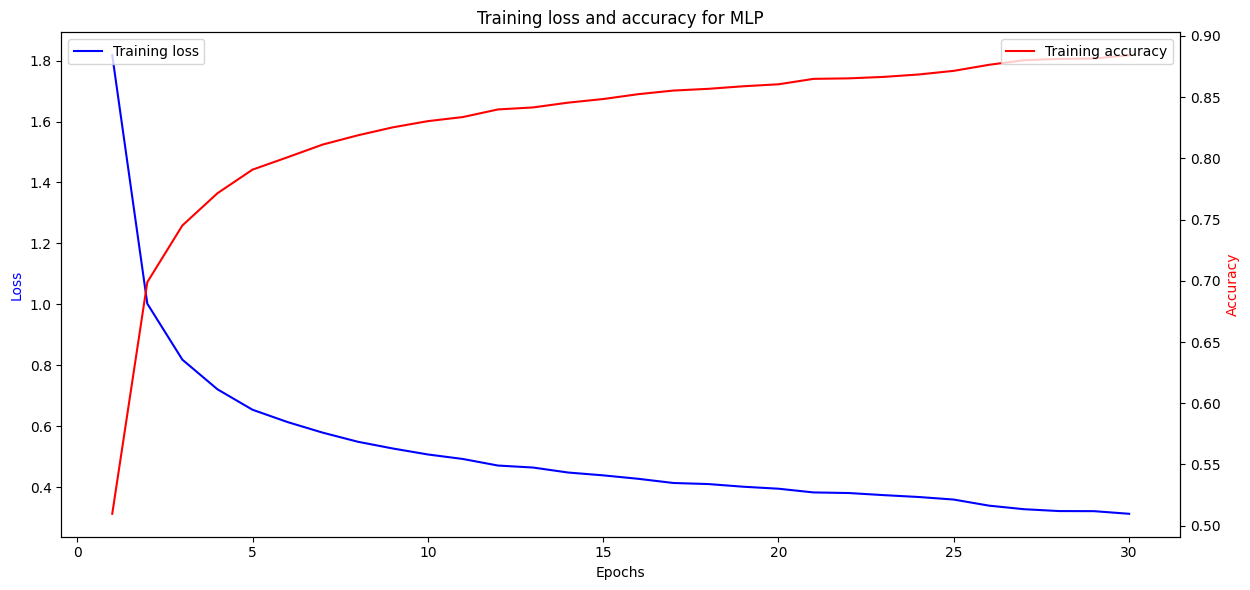

In [40]:
# Plot training loss and accuracy values
epochs = range(1, len(history_mlp.history['loss']) + 1)
plt.figure(figsize=(12, 6))

# Plot training loss values
plt.plot(epochs, history_mlp.history['loss'], 'b', label='Training loss')
plt.title('Training loss and accuracy for MLP')
plt.xlabel('Epochs')
plt.ylabel('Loss', color='b')
plt.legend(loc='upper left')
plt.tight_layout()

# Create a second y-axis for the accuracy values
plt.twinx()

# Plot training accuracy values
plt.plot(epochs, history_mlp.history['accuracy'], 'r', label='Training accuracy')
plt.ylabel('Accuracy', color='r')
plt.legend(loc='upper right')

plt.show()

## CNN

In [42]:
start_cnn = time.time()

model_cnn = Sequential()
model_cnn.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding = 'same', input_shape=(28, 28, 1)))
model_cnn.add(BatchNormalization())
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.2))

# Add another convolutional layer
model_cnn.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn.add(BatchNormalization())
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.2))

# Add a third convolutional layer
model_cnn.add(Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding = 'same'))
model_cnn.add(BatchNormalization())
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.2))

# Add a flatten layer to convert the 2D matrix data to a vector
model_cnn.add(Flatten())

# A fully connected layer with 128 neurons
model_cnn.add(Dense(128))
model_cnn.add(BatchNormalization())
model_cnn.add(Activation('relu'))
model_cnn.add(Dropout(0.5))

# Output layer
model_cnn.add(Dense(num_classes, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model_cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# Define the learning rate reduction
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

# Fit the model
history_cnn = model_cnn.fit(x_train, y_train, batch_size=512, epochs=30, verbose=0, validation_data=(x_test, y_test), callbacks=[lr_reduction])

train_loss, train_accuracy = model_cnn.evaluate(x_train, y_train)
print(f'Training loss: {train_loss}, Training accuracy: {train_accuracy}')
loss, accuracy = model_cnn.evaluate(x_test, y_test)
print(f' Testing Loss: {loss}, Testing Accuracy: {accuracy}')
end_cnn = time.time()
elapsed_cnn = end_cnn - start_cnn
print(f'Training time: {elapsed_cnn} seconds')

d:\software\anaconda\envs\ipy\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(



Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 30: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9183 - loss: 0.2124
Training loss: 0.212260901927948, Training accuracy: 0.9176063537597656
588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8969 - loss: 0.2997
 Testing Loss: 0.2967361509799957, Testing Accuracy: 0.8959574699401855
Training time: 3388.999717950821 seconds


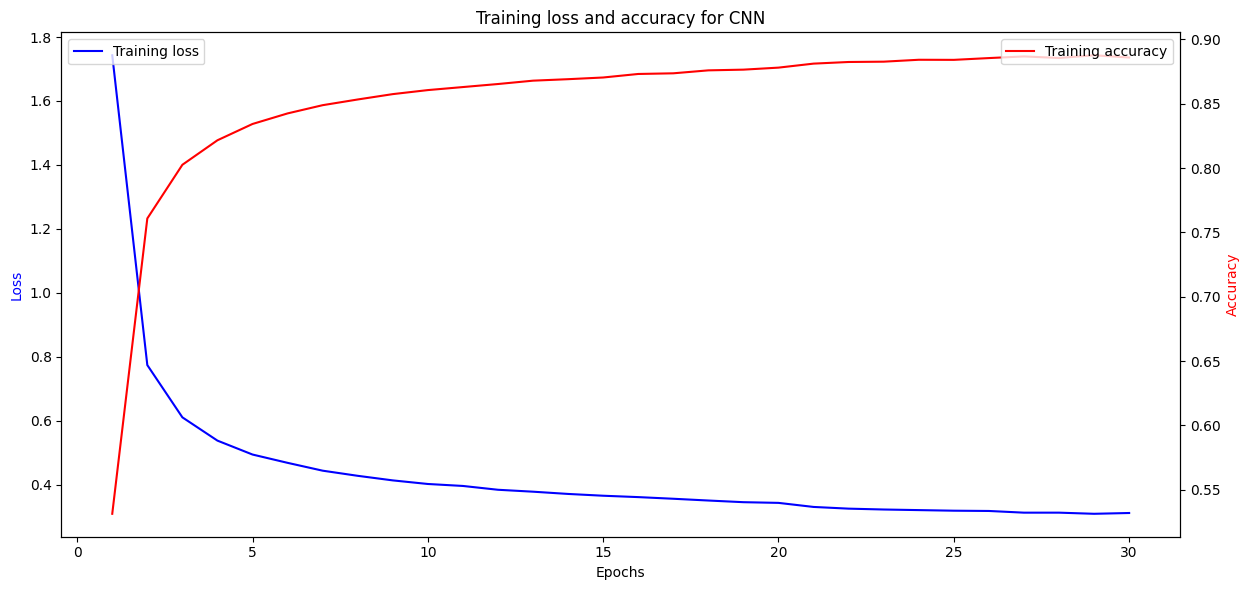

In [43]:
# Plot training loss and accuracy values
epochs = range(1, len(history_cnn.history['loss']) + 1)
plt.figure(figsize=(12, 6))

# Plot training loss values
plt.plot(epochs, history_cnn.history['loss'], 'b', label='Training loss')
plt.title('Training loss and accuracy for CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss', color='b')
plt.legend(loc='upper left')
plt.tight_layout()

# Create a second y-axis for the accuracy values
plt.twinx()

# Plot training accuracy values
plt.plot(epochs, history_cnn.history['accuracy'], 'r', label='Training accuracy')
plt.ylabel('Accuracy', color='r')
plt.legend(loc='upper right')

plt.show()

# Prediction Part

In [44]:
# Predict the values from the validation dataset
y_pred_mlp = model_mlp.predict(x_test)
y_pred_cnn = model_cnn.predict(x_test)

# Convert predictions classes to one hot vectors 
y_pred_classes_mlp = np.argmax(y_pred_mlp, axis = 1) 
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis = 1) 

# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis = 1) 

588/588 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


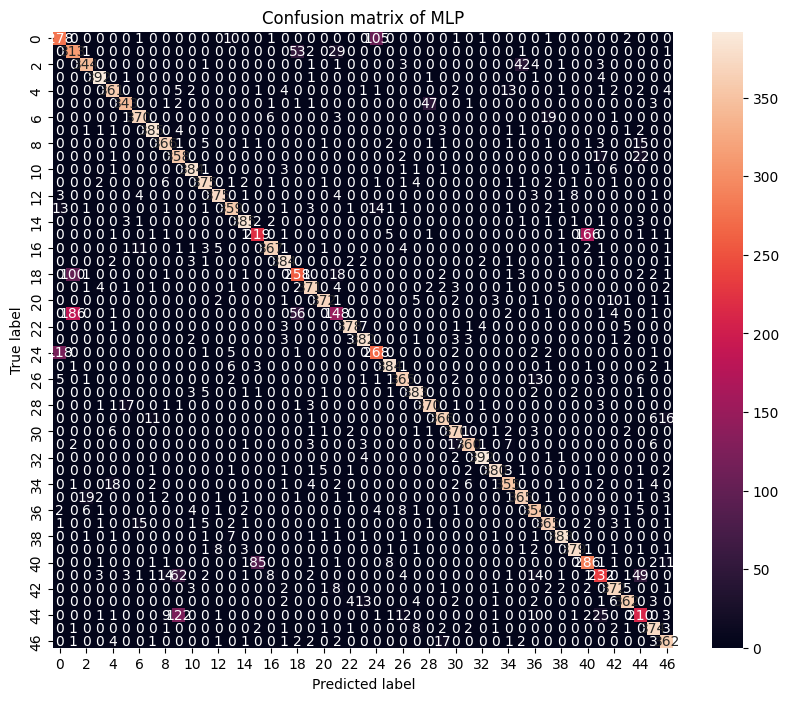

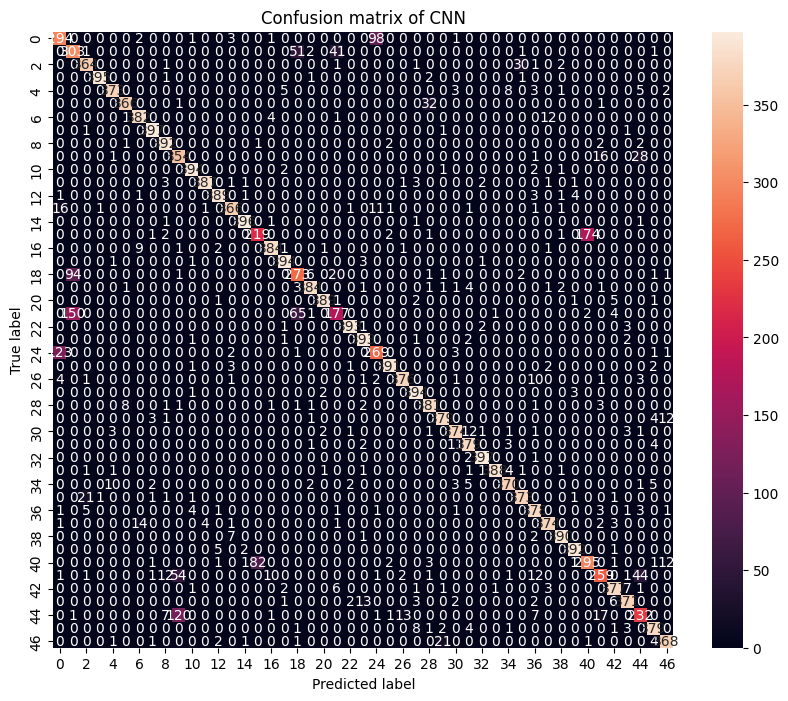

In [45]:
# compute the confusion matrix
confusion_mtx_mlp = confusion_matrix(y_true, y_pred_classes_mlp) 
confusion_mtx_cnn = confusion_matrix(y_true, y_pred_classes_cnn) 

# plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx_mlp, annot=True, fmt="d")
plt.title("Confusion matrix of MLP")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx_cnn, annot=True, fmt="d")
plt.title("Confusion matrix of CNN")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [47]:
# Classification report
report = classification_report(y_true, y_pred_classes_mlp)
print('Classification Report for MLP:')
print(report)


Classification Report for MLP:
              precision    recall  f1-score   support

           0       0.66      0.69      0.68       400
           1       0.52      0.78      0.62       400
           2       0.91      0.86      0.89       400
           3       0.96      0.98      0.97       400
           4       0.90      0.90      0.90       400
           5       0.93      0.86      0.89       400
           6       0.92      0.93      0.92       400
           7       0.95      0.96      0.96       400
           8       0.91      0.92      0.91       400
           9       0.64      0.90      0.75       400
          10       0.95      0.96      0.96       400
          11       0.93      0.94      0.94       400
          12       0.95      0.94      0.94       400
          13       0.91      0.90      0.90       400
          14       0.96      0.96      0.96       400
          15       0.70      0.55      0.61       400
          16       0.95      0.92      0.93       

In [53]:
# Calculate average F1-score
report = classification_report(y_true, y_pred_classes_mlp, output_dict=True)
avg_f1_score = np.mean([class_report['f1-score'] for class_report in report.values() if isinstance(class_report, dict)])

print(f'These classes has lower F1-score than the average F1-score {avg_f1_score} :')
# Print classes with F1-score lower than the average
for class_name, class_report in report.items():
    if class_name in ['macro avg', 'weighted avg', 'accuracy']:
        continue
    if isinstance(class_report, dict) and class_report['f1-score'] < avg_f1_score:
        print(f'{class_name} label:{label_dictionary[int(class_name)]} {class_report["f1-score"]}')

These classes has lower F1-score than the average F1-score 0.8658149575878094 :
0 label:0 0.6780487804878049
1 label:1 0.6228855721393035
9 label:9 0.7489539748953975
15 label:F 0.6134453781512605
18 label:I 0.6658064516129032
21 label:L 0.47435897435897434
24 label:O 0.6742138364779874
40 label:f 0.6605080831408776
41 label:g 0.655367231638418
44 label:q 0.5817174515235457


In [54]:
print('Classification Report for CNN:')
print(classification_report(y_true, y_pred_classes_cnn))

Classification Report for CNN:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       400
           1       0.55      0.76      0.64       400
           2       0.92      0.91      0.92       400
           3       0.99      0.99      0.99       400
           4       0.96      0.93      0.94       400
           5       0.97      0.92      0.94       400
           6       0.94      0.95      0.95       400
           7       0.98      0.99      0.98       400
           8       0.93      0.98      0.95       400
           9       0.67      0.89      0.76       400
          10       0.97      0.98      0.98       400
          11       0.99      0.97      0.98       400
          12       0.97      0.97      0.97       400
          13       0.95      0.92      0.93       400
          14       0.99      0.99      0.99       400
          15       0.73      0.55      0.62       400
          16       0.96      0.96      0.96       

In [55]:
# Calculate average F1-score
report = classification_report(y_true, y_pred_classes_cnn, output_dict=True)
avg_f1_score = np.mean([class_report['f1-score'] for class_report in report.values() if isinstance(class_report, dict)])

print(f'These classes has lower F1-score than the average F1-score {avg_f1_score} :')
# Print classes with F1-score lower than the average
for class_name, class_report in report.items():
    if class_name in ['macro avg', 'weighted avg', 'accuracy']:
        continue
    if isinstance(class_report, dict) and class_report['f1-score'] < avg_f1_score:
        print(f'{class_name} label:{label_dictionary[int(class_name)]} {class_report["f1-score"]}')

These classes has lower F1-score than the average F1-score 0.8948443655665702 :
0 label:0 0.6991676575505351
1 label:1 0.6392405063291139
9 label:9 0.759656652360515
15 label:F 0.6239316239316239
18 label:I 0.6859296482412061
21 label:L 0.5454545454545454
24 label:O 0.6871008939974457
40 label:f 0.676605504587156
41 label:g 0.7347517730496453
44 label:q 0.6435506241331485


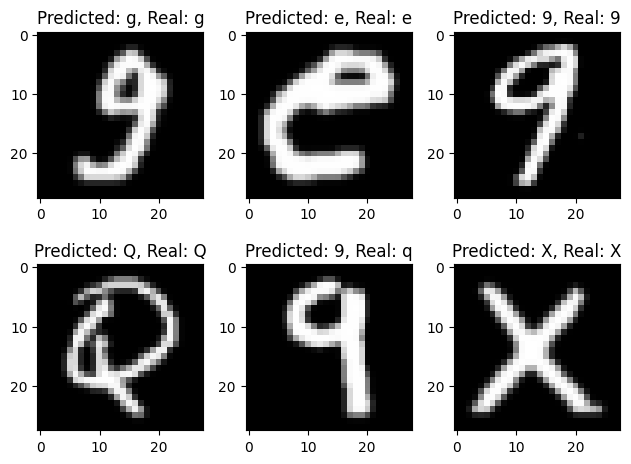

In [56]:
for i in range(0, 6):
    plt.subplot(2, 3, (i+1))
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {label_dictionary[y_pred_classes_mlp[i]]}, Real: {label_dictionary[y_true[i]]}")
plt.tight_layout() 
plt.show()

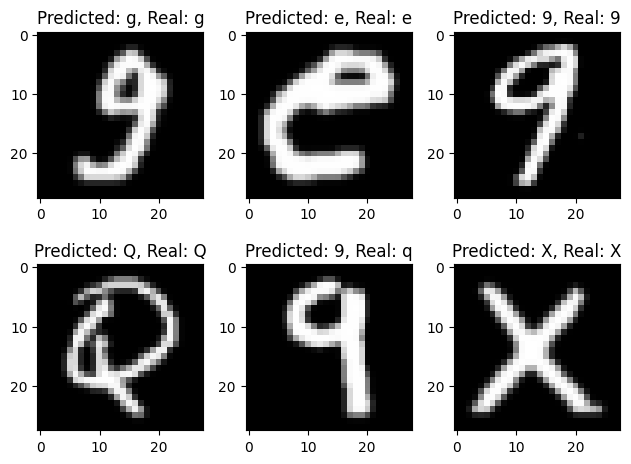

In [57]:
for i in range(0, 6):
    plt.subplot(2, 3, (i+1))
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {label_dictionary[y_pred_classes_cnn[i]]}, Real: {label_dictionary[y_true[i]]}")
plt.tight_layout() 
plt.show()